In [1]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

#Let’s pick three different kernels and compare how they will perform.

kernels=['linear', 'poly', 'rbf']

for kernel in kernels:
    svc = svm.SVC(kernel=kernel)
    C_s = np.logspace(-15, 0, 15)
    scores = list()
    scores_std = list()

In [3]:
for C in C_s:
    svc.C = C
    this_scores = cross_val_score(svc, X, y, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

Text(0.5, 0.98, 'Kernel:>rbf')

([<matplotlib.axis.YTick at 0x231ddba8cc0>,
 <a list of 10 Text yticklabel objects>)

Text(0, 0.5, 'Cross-Validation Score')

Text(0.5, 0, 'Parameter C')

(0, 1.1)

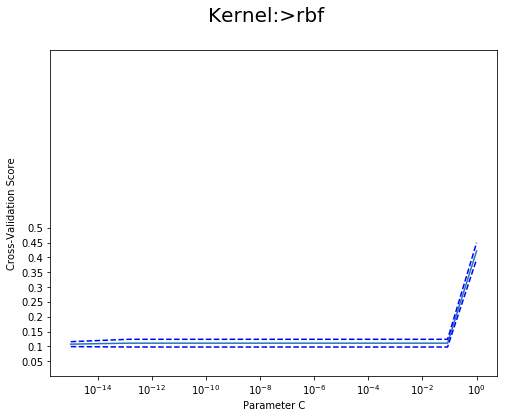

In [4]:
#You must plot your results.
Title="Kernel:>" + kernel
fig=plt.figure(1, figsize=(8, 6))
plt.clf()
fig.suptitle(Title, fontsize=20)
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('Cross-Validation Score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
plt.show()